In [485]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, MultiPoint
import numpy as np

In [486]:
pa_municipios = gpd.read_file('data/shapes/pa_municipios/15MUE250GC_SIR.shp', geom_col='geometry', encoding='utf-8')
privado = gpd.read_file('data/shapes/Sigef Privado_PA/Sigef Privado_PA.shp',geom_col='geometry', encoding='utf-8')
regulariz = gpd.read_file('data/shapes/Parcela Regularização_PA/Parcela Regularização_PA.shp',geom_col='geometry', encoding='utf-8')
assentamentos = gpd.read_file('data/shapes/Assentamento Brasil_PA/Assentamento Brasil_PA.shp', geom_col='geometry', encoding='utf-8')
ucs = gpd.read_file('data/shapes/UCS/ucstodas.shp', geom_col='geometry', encoding='utf-8')

focos_2018 = gpd.read_file('data/focos/Focos.2018-07-01.2018-09-19.shp/', geom_col='geometry', encoding='utf-8')
focos_2019 = gpd.read_file('data/focos/Focos.2019-07-01.2019-09-19.shp/', geom_col='geometry', encoding='utf-8')

/home/helvecio/miniconda3/envs/hackathon/lib/python3.7/site-packages/geopandas/plotting.py:404: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


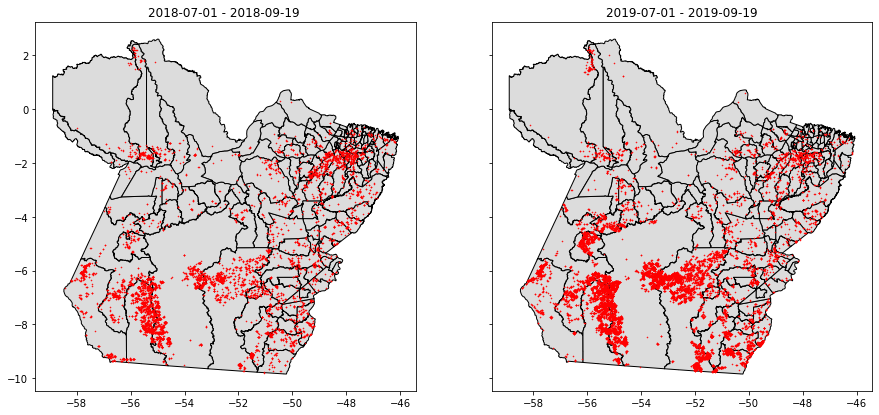

In [611]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(15,15))
pa_municipios.plot(ax=ax1, color='#dcdcdc', column='NM_MUNICIP',edgecolor='black', legend=False)
pa_municipios.plot(ax=ax2, color='#dcdcdc', column='NM_MUNICIP',edgecolor='black', legend=False)
focos_2018.plot(ax=ax1, color='red', markersize=0.3)
focos_2019.plot(ax=ax2, color='red', markersize=0.3)
ax1.set_title('2018-07-01 - 2018-09-19 ')
ax2.set_title('2019-07-01 - 2019-09-19')
plt.show()

In [488]:
municipio = 'NOVO PROGRESSO'
municip_id = 1505031

municpoly = pa_municipios[pa_municipios.NM_MUNICIP == municipio]
asspoly = assentamentos[assentamentos.municipio == municipio]
privpoly = privado[privado.municipio_ == municip_id]
regulaz = regulariz[regulariz.municipio_ == municip_id]

nprg_2018 = focos_2018[focos_2018.Municipi == municipio]
nprg_2019 = focos_2019[focos_2019.Municipi == municipio]

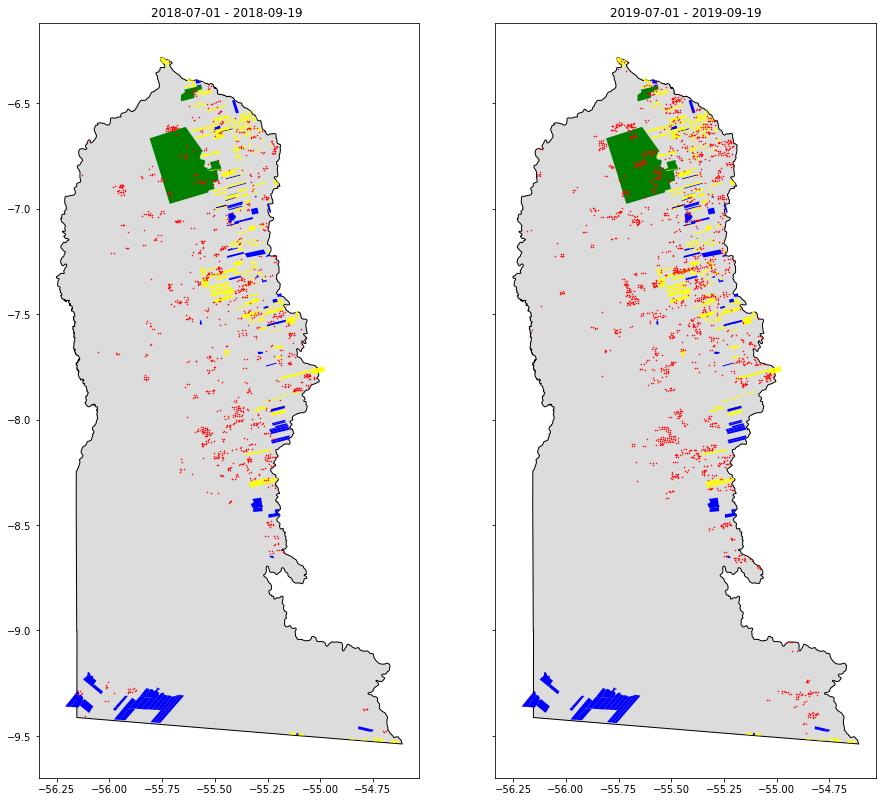

In [579]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(15,15))

municpoly.plot(ax=ax1, color='#dcdcdc', edgecolor='black')
municpoly.plot(ax=ax2, color='#dcdcdc', edgecolor='black')
asspoly.plot(ax=ax1,color='green', label='Assentamento')
asspoly.plot(ax=ax2,color='green', label='Assentamento')
privpoly.plot(ax=ax2,color='blue', label='Privado')
privpoly.plot(ax=ax1,color='blue', label='Privado')
regulaz.plot(ax=ax1,color='yellow', label='Regularizacao')
regulaz.plot(ax=ax2,color='yellow', label='Regularizacao')

nprg_2018.plot(ax=ax1, color='red', markersize=0.3)
nprg_2019.plot(ax=ax2, color='red', markersize=0.3)

ax1.set_title('2018-07-01 - 2018-09-19 ')
ax2.set_title('2019-07-01 - 2019-09-19')
plt.show()

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def point_polygon(polygons,pts):

    pts = pts.reset_index().copy()
    pts_in_polys = []

    for i, poly in polygons.iterrows():
        pts_in_this_poly = []

        for j, pt in pts.iterrows():
            if poly.geometry.contains(pt.geometry):
                pts_in_this_poly.append(pt.geometry)
                pts = pts.drop([j])

        pts_in_polys.append(len(pts_in_this_poly))
    
    return len(pts_in_this_poly)

In [647]:
munic_df = pd.DataFrame({'Municipio':municpoly.NM_MUNICIP,
                         'FOCOS2018':kk,
                         'FOCOS2019':ll,
                         'ASSENT2018':a,
                         'ASSENT2019':c,
                         'PRIV2018':b,
                         'PRIV2019':s})
munic_df

,Municipio,FOCOS2018,FOCOS2019,ASSENT2018,ASSENT2019,PRIV2018,PRIV2019
14,NOVO PROGRESSO,1204,1885,57,137,15,8


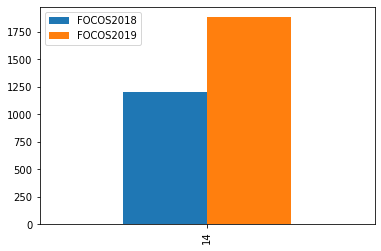

In [648]:
munic_df[['FOCOS2018','FOCOS2019']].plot.bar()

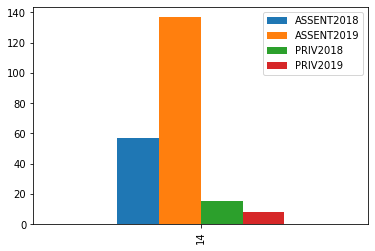

In [617]:
munic_df[['ASSENT2018','ASSENT2019','PRIV2018','PRIV2019']].plot.bar()

In [643]:
kk

14    1204
Name: NUM_POINTS, dtype: int64

In [640]:
s2019 = point_polygon(municpoly,nprg_2019).NUM_POINTS

/home/helvecio/miniconda3/envs/hackathon/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [642]:
kk = point_polygon(municpoly,nprg_2019).NUM_POINTS
ll = point_polygon(municpoly,nprg_2018).NUM_POINTS

/home/helvecio/miniconda3/envs/hackathon/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [584]:
s =point_polygon(privpoly,nprg_2018).NUM_POINTS.sum()
b =point_polygon(privpoly,nprg_2019).NUM_POINTS.sum()
a = point_polygon(asspoly,nprg_2018).NUM_POINTS.sum()
c = point_polygon(asspoly,nprg_2019).NUM_POINTS.sum()

/home/helvecio/miniconda3/envs/hackathon/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [629]:
def point_polygon(poly, pts):
    
    polygons = poly
    pts = pts.reset_index().copy()
    pts_in_polys = []

    for i, poly in polygons.iterrows():
        pts_in_this_poly = []

        for j, pt in pts.iterrows():
            if poly.geometry.contains(pt.geometry):
                pts_in_this_poly.append(pt.geometry)
                pts = pts.drop([j])

        pts_in_polys.append(len(pts_in_this_poly))

    polygons['NUM_POINTS'] = pts_in_polys
    return polygons